+ Name - Vanshita
+ Roll Number - 2021101102

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests

Adjusting P values

In [2]:
p_values = np.array([0.0050, 0.0010, 0.0100, 0.0005, 0.0009, 0.0400, 0.0560, 0.0500, 0.0480, 0.0130, 0.0370, 0.0430, 0.0020, 0.0250, 0.1100, 0.0700, 0.0800])
alpha = np.array([0.05]*17)
sorted_indices = np.argsort(p_values)
sorted_p_values = p_values[sorted_indices]

## Bonferroni Test

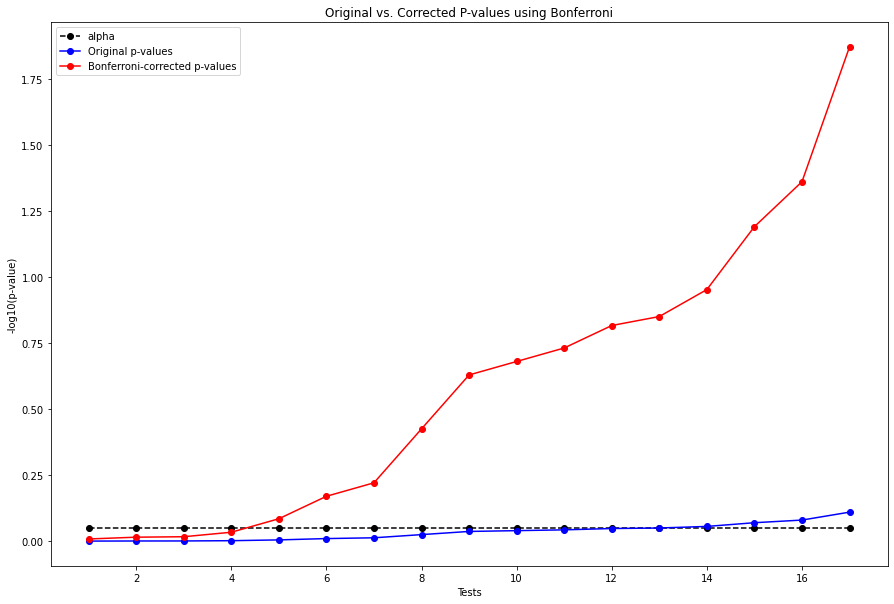

In [3]:
# Apply Bonferroni correction
bonferroni_corrected_p = sorted_p_values * len(sorted_p_values)

plt.figure(figsize=(15, 10))

plt.plot(range(1, len(sorted_p_values) + 1), alpha,  marker='o', linestyle='--', color = 'blacK', label='alpha')

# Plot original p-values
plt.plot(range(1, len(sorted_p_values) + 1), sorted_p_values, marker='o', linestyle='-', color="blue", label='Original p-values')

# Plot Bonferroni-corrected p-values
plt.plot(range(1, len(sorted_p_values) + 1), bonferroni_corrected_p, marker='o', linestyle='-', color='red',  label='Bonferroni-corrected p-values')

plt.xlabel('Tests')
plt.ylabel('-log10(p-value)')
plt.title('Original vs. Corrected P-values using Bonferroni')
plt.legend()
plt.show()

## Benjamini Hochberg Correction

In [4]:
m = len(sorted_p_values)
# Benjamini-Hochberg correction
bh_corrected_p = sorted_p_values * m / np.arange(1,m+1)
# Clip values to be less than or equal to 1
bh_corrected_p = np.minimum(bh_corrected_p, 1.0)


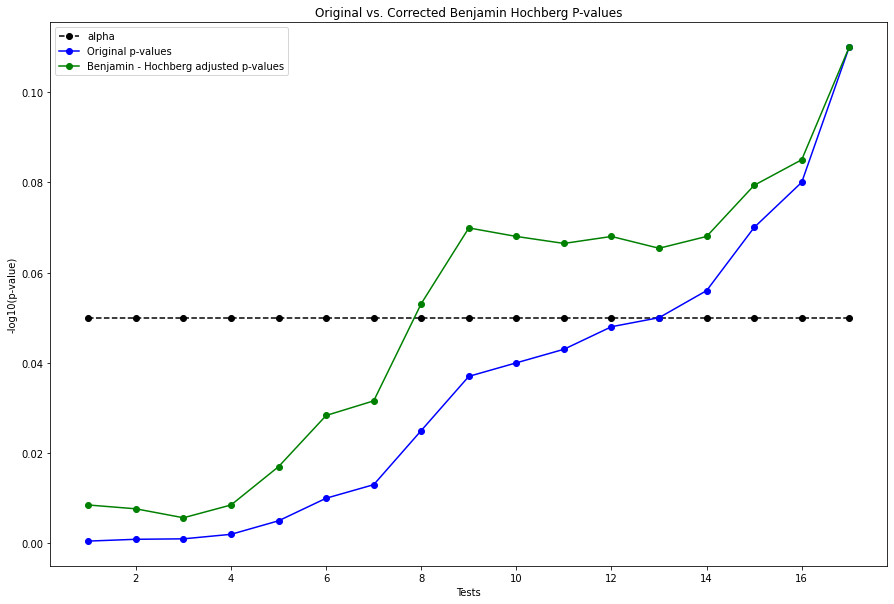

In [5]:
plt.figure(figsize=(15, 10))

# Plotting alpha
plt.plot(range(1, len(sorted_p_values) + 1), alpha,  marker='o', linestyle='--', color = 'blacK', label='alpha')

# Plot original p-values
plt.plot(range(1, len(sorted_p_values) + 1), sorted_p_values, marker='o', linestyle='-', color = "blue", label='Original p-values')

# Plot Benjamnini - corrected p-values
plt.plot(range(1, len(sorted_p_values) + 1), bh_corrected_p, marker='o', linestyle='-', color='green', label='Benjamin - Hochberg adjusted p-values')

plt.xlabel('Tests')
plt.ylabel('-log10(p-value)')
plt.title('Original vs. Corrected Benjamin Hochberg P-values')
plt.legend()

# Show the plot
plt.show()

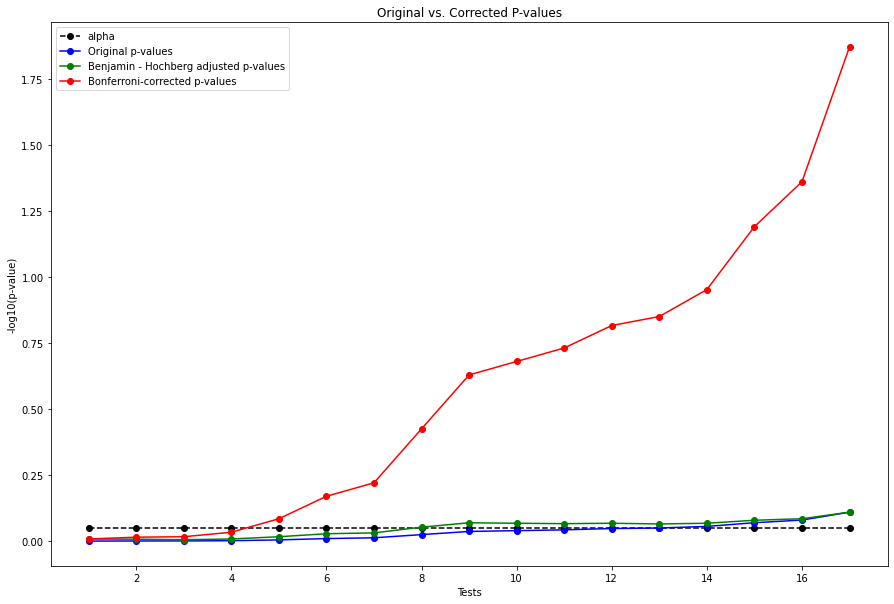

In [6]:
# Create a graph
plt.figure(figsize=(15, 10))

# Plot alpha 
plt.plot(range(1, len(sorted_p_values) + 1), alpha,  marker='o', linestyle='--', color = 'blacK', label='alpha')

# Plot original p-values
plt.plot(range(1, len(sorted_p_values) + 1), sorted_p_values, marker='o', linestyle='-', color = "blue", label='Original p-values')

# Plot Bonferroni-corrected p-values
plt.plot(range(1, len(sorted_p_values) + 1), bh_corrected_p, marker='o', linestyle='-', color='green', label='Benjamin - Hochberg adjusted p-values')

# Plot Bonferroni-corrected p-values
plt.plot(range(1, len(sorted_p_values) + 1), bonferroni_corrected_p, marker='o', linestyle='-', color='red',  label='Bonferroni-corrected p-values')

plt.xlabel('Tests')
plt.ylabel('-log10(p-value)')
plt.title('Original vs. Corrected P-values')
plt.legend()

# Show the plot
plt.show()

### *Observations*

1. In statistical terms, a correction method is considered conservative if it tends to be less permissive in rejecting null hypotheses. The Bonferroni correction is indeed known to be a conservative approach as it controls the familywise error rate, ensuring that the probability of making at least one Type I error (false positive) across all comparisons is controlled at a specified level.

2. In the context of the above corrected p-values, we can observe that the Bonferroni-corrected p-values **(in red)** are generally higher than the Benjamini-Hochberg corrected p-values **(in green)** . This indicates that the Bonferroni correction is adjusting the p-values more conservatively, making it less likely to reject the null hypothesis.

3. We can compare the original p-values, Benjamini-Hochberg corrected p-values, and Bonferroni-corrected p-values on the graph to see the impact of each correction method. The Bonferroni correction tends to be more stringent, making it appropriate in situations where controlling the familywise error rate is crucial, but it might also increase the chance of false negatives.

The raw p-values, representing initial statistical significance, scatter across the plot. Bonferroni correction, a conservative method, increases p-values, reflecting its adjustment for multiple comparisons. In contrast, Benjamini-Hochberg correction, less conservative, results in lower p-values, especially for less significant tests. The plot visually highlights BH correction's advantage, detecting more true positives while controlling the false discovery rate, compared to Bonferroni correction.